# Exploring FRED Economic Datasets

## Setup

### 1. Imports & Settings

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from fredapi import Fred

In [6]:
plt.style.use('ggplot') # set default plotting style
pd.set_option('display.max_columns', 100)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] # list of colors from style

### 2. FRED API

In [8]:
import getpass

In [9]:
# prompt for your FRED API key (you can request for a key here https://fred.stlouisfed.org/docs/api/api_key.html)
fred_key = getpass.getpass(prompt='API Key: ')

API Key:  ········


In [10]:
fred = Fred(api_key = fred_key)

## Search & Explore Datasets

### 1. Dow Jones

#### Explore & Plot

In [14]:
# search FRED for datasets containing Dow Jones data
fred.search('dow', limit = 5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DJIA,DJIA,2024-07-29,2024-07-29,Dow Jones Industrial Average,2014-07-28,2024-07-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-26 19:01:03-05:00,74,The observations for the Dow Jones Industrial ...
DJTA,DJTA,2024-07-29,2024-07-29,Dow Jones Transportation Average,2014-07-28,2024-07-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-26 19:01:03-05:00,45,The observations for the Dow Jones Transportat...
M1109BUSM293NNBR,M1109BUSM293NNBR,2024-07-29,2024-07-29,Dow-Jones Industrial Stock Price Index for Uni...,1914-12-01,1968-12-01,Monthly,M,Dollars per Share,$ Per Share,Not Seasonally Adjusted,NSA,2012-08-15 15:02:00-05:00,50,Series Is Presented Here As Two Variables--(1)...
M1109AUSM293NNBR,M1109AUSM293NNBR,2024-07-29,2024-07-29,Dow-Jones Industrial Stock Price Index for Uni...,1897-01-01,1916-09-01,Monthly,M,Dollars per Share,$ Per Share,Not Seasonally Adjusted,NSA,2012-08-15 15:01:12-05:00,14,Series Is Presented Here As Two Variables--(1)...
DJCA,DJCA,2024-07-29,2024-07-29,Dow Jones Composite Average,2014-07-28,2024-07-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-26 19:01:02-05:00,31,The observations for the Dow Jones Composite A...


In [15]:
# create series
dji = fred.get_series(series_id = 'DJIA')

In [16]:
# check null values
dji.loc[dji.isnull()]

2014-09-01   NaN
2014-11-27   NaN
2014-12-25   NaN
2015-01-01   NaN
2015-01-19   NaN
              ..
2024-02-19   NaN
2024-03-29   NaN
2024-05-27   NaN
2024-06-19   NaN
2024-07-04   NaN
Length: 93, dtype: float64

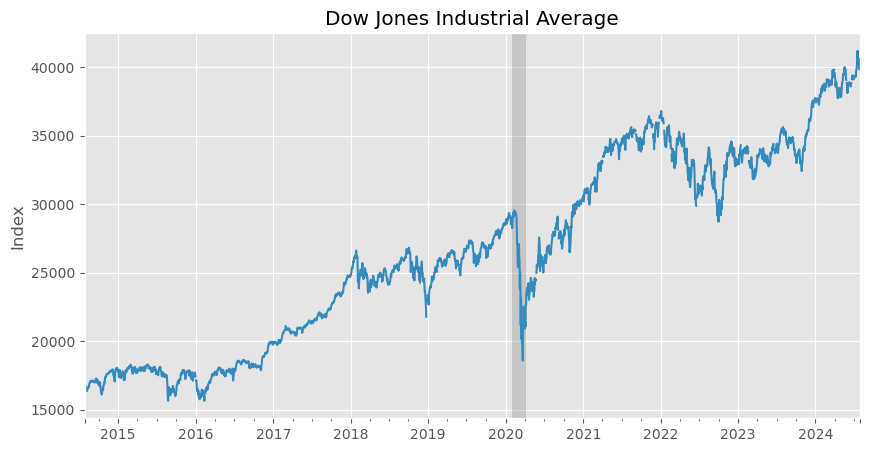

In [17]:
# plot the data
dji.plot(
    figsize = (10, 5),
    title = 'Dow Jones Industrial Average',
    color = color_pal[1],
    ylabel = 'Index',
)

# recession bar https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/
rec_start = '2020-02-01'
rec_end = '2020-04-01'
plt.axvspan(rec_start, rec_end, alpha=0.3, color = 'grey')

plt.show()

#### 14 Day Moving Average

In [19]:
# turn series into dataframe and create 14 moving average
dji_2 = pd.DataFrame(dji).reset_index()
dji_2 = dji_2.rename(columns = {'index':'date', 0:'price'})
dji_2['14d_rolling_avg'] = dji_2['price'].rolling(window = 14, min_periods = 1).mean()
dji_2

,date,price,14d_rolling_avg
0,2014-07-28,16982.59,16982.590000
1,2014-07-29,16912.11,16947.350000
2,2014-07-30,16880.36,16925.020000
3,2014-07-31,16563.30,16834.590000
4,2014-08-01,16493.37,16766.346000
...,...,...,...
2605,2024-07-22,40415.44,40040.685385
2606,2024-07-23,40358.09,40121.461538
2607,2024-07-24,39853.87,40102.347857
2608,2024-07-25,39935.07,40142.290714


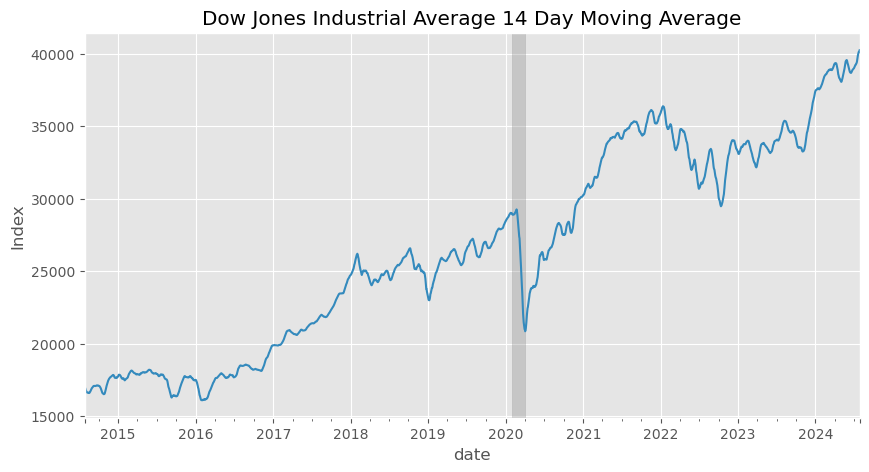

In [20]:
# plot the data
dji_2.plot(
    x = 'date',
    y = '14d_rolling_avg',
    figsize = (10, 5),
    title = 'Dow Jones Industrial Average 14 Day Moving Average',
    color = color_pal[1],
    ylabel = 'Index',
    legend = False
)

# recession bar https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/
rec_start = '2020-02-01'
rec_end = '2020-04-01'
plt.axvspan(rec_start, rec_end, alpha=0.3, color = 'grey')

plt.show()

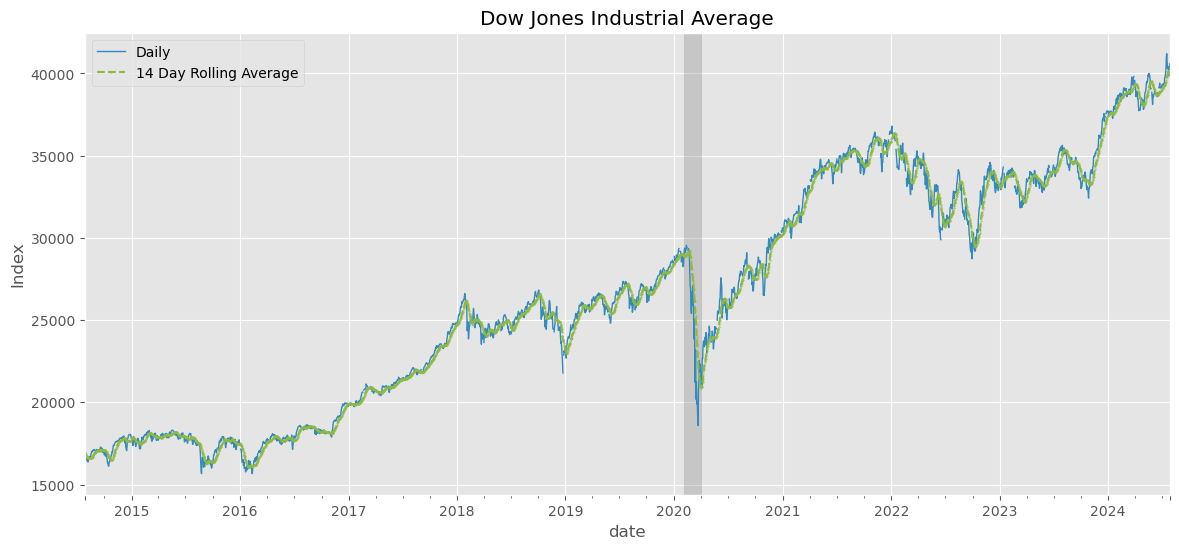

In [32]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the first dataset on the same axis
dji.plot(
    ax = ax, 
    color = color_pal[1],
    label = 'Daily',
    linewidth = 1,
    xlabel = 'Date',
    ylabel = 'Index'
)

# Add the recession bar to the plot https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/
rec_start = '2020-02-01'
rec_end = '2020-04-01'
ax.axvspan(rec_start, rec_end, alpha = 0.3, color = 'grey')

# Plot the second dataset on the same axis
dji_2.plot(
    ax = ax, 
    x = 'date', 
    y = '14d_rolling_avg', 
    label = '14 Day Rolling Average',
    color = color_pal[5], 
    linestyle = 'dashed', 
    marker = '.',
    fillstyle = 'none', 
    markersize = 1
)

# Display the legend
ax.legend()

ax.set_title('Dow Jones Industrial Average')

# Save figure
plt.savefig('dow_jones_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### 2. House Price vs Salary

#### Pull housing data 

In [34]:
# search housing prices
fred.search('median house price', limit = 100).head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
MSPUS,MSPUS,2024-07-29,2024-07-29,Median Sales Price of Houses Sold for the Unit...,1963-01-01,2024-04-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2024-07-24 09:01:01-05:00,90,None
MSPNHSUS,MSPNHSUS,2024-07-29,2024-07-29,Median Sales Price for New Houses Sold in the ...,1963-01-01,2024-06-01,Monthly,M,Dollars,$,Not Seasonally Adjusted,NSA,2024-07-24 09:01:05-05:00,67,None
HOSMEDUSM052N,HOSMEDUSM052N,2024-07-29,2024-07-29,Median Sales Price of Existing Homes,2023-06-01,2024-06-01,Monthly,M,Dollars,$,Not Seasonally Adjusted,NSA,2024-07-23 09:16:21-05:00,66,The National Association of Realtors monthly h...
MSPNHSUSA,MSPNHSUSA,2024-07-29,2024-07-29,Median Sales Price for New Houses Sold in the ...,1963-01-01,2023-01-01,Annual,A,Dollars,$,Not Seasonally Adjusted,NSA,2024-05-23 09:01:13-05:00,8,None
MEDLISPRIPERSQUFEEUS,MEDLISPRIPERSQUFEEUS,2024-07-29,2024-07-29,Housing Inventory: Median Listing Price per Sq...,2016-07-01,2024-06-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-07-09 16:48:03-05:00,55,The median listing price per square foot in a ...


In [35]:
# pull median house prices and turn into a dataframe
house_price = fred.get_series(series_id = 'MSPUS')
house_price = house_price.to_frame()
house_price = house_price.reset_index()
house_price.columns = ['date', 'price']
house_price.head()

,date,price
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


#### Pull salary data

In [38]:
salary_search = fred.search('salary')

In [39]:
# explore search results
print(salary_search.shape)
print(salary_search.columns)

(1000, 15)
Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')


In [40]:
# explore search results
salary_search = salary_search[[
                'id', #'realtime_start', 'realtime_end', 
               'title', 'observation_start','observation_end', 'frequency', #'frequency_short', 
               'units', #'units_short', 
               'seasonal_adjustment' #, 'seasonal_adjustment_short','last_updated', 'popularity','notes'
                ]]
salary_search = salary_search.query('frequency == "Quarterly" and seasonal_adjustment == "Not Seasonally Adjusted" and units == "Dollars"')
salary_search['title_short'] = salary_search['title'].str.replace('Employed full time: Median usual weekly nominal earnings (second quartile): Wage and salary workers: ', '')
salary_search

,id,title,observation_start,observation_end,frequency,units,seasonal_adjustment,title_short
series id,,,,,,,,
LEU0252881500Q,LEU0252881500Q,Employed full time: Median usual weekly nomina...,1979-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,16 years and over
LEU0252918500Q,LEU0252918500Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,Bachelor's degree and higher: 25 years and over
LEU0252917300Q,LEU0252917300Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,"High School graduates, no college: 25 years an..."
LEU0252919100Q,LEU0252919100Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,Bachelor's degree only: 25 years and over
LEU0252916700Q,LEU0252916700Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,Less than a High School diploma: 25 years and ...
...,...,...,...,...,...,...,...,...
LEU0254566300Q,LEU0254566300Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,Production occupations: 16 years and over
LEU0252890900Q,LEU0252890900Q,Employed full time: Median usual weekly nomina...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,55 to 64 years
LEU0252919200Q,LEU0252919200Q,Employed full time: Usual weekly nominal earni...,2000-01-01,2024-04-01,Quarterly,Dollars,Not Seasonally Adjusted,Employed full time: Usual weekly nominal earni...


In [41]:
# pull salary data 
salary = fred.get_series(series_id = "LEU0252918500Q")

In [42]:
salary = salary.to_frame()
salary = salary.reset_index()
salary.columns = ['date', 'weekly_salary']
salary['annual_salary'] = salary['weekly_salary'] * 52
print(salary.head())

        date  weekly_salary  annual_salary
0 2000-01-01          886.0        46072.0
1 2000-04-01          887.0        46124.0
2 2000-07-01          896.0        46592.0
3 2000-10-01          894.0        46488.0
4 2001-01-01          916.0        47632.0


#### Merge salary and housing data

In [44]:
# merge salary and housing data
hou_sal = pd.merge(house_price, salary, how = 'outer', on = 'date', indicator = True)

In [45]:
# check if merge was successful
hou_sal.query("_merge == 'left_only'")

,date,price,weekly_salary,annual_salary,_merge
0,1963-01-01,17800.0,NaN,NaN,left_only
1,1963-04-01,18000.0,NaN,NaN,left_only
2,1963-07-01,17900.0,NaN,NaN,left_only
3,1963-10-01,18500.0,NaN,NaN,left_only
4,1964-01-01,18500.0,NaN,NaN,left_only
...,...,...,...,...,...
143,1998-10-01,153000.0,NaN,NaN,left_only
144,1999-01-01,157400.0,NaN,NaN,left_only
145,1999-04-01,158700.0,NaN,NaN,left_only
146,1999-07-01,159100.0,NaN,NaN,left_only


In [47]:
# clean merged dataframe
hou_sal = hou_sal.query("_merge == 'both'")
hou_sal = hou_sal.drop(columns = '_merge')
hou_sal[['price', 'weekly_salary', 'annual_salary']] = hou_sal[['price', 'weekly_salary', 'annual_salary']].astype(int)

#### Salary vs Housing Price

In [80]:
import matplotlib.pyplot as plt

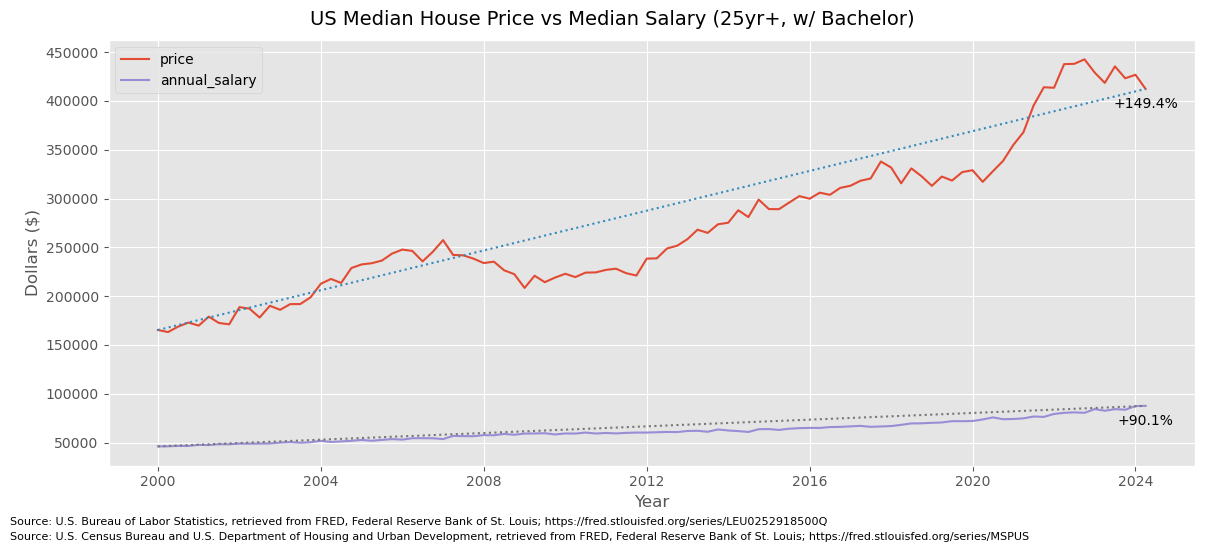

In [129]:


# Create a new figure
plt.figure(figsize=(12, 5))

last_date = hou_sal['date'].iloc[-1]
first_date = hou_sal['date'].iloc[0]
date_x = [first_date, last_date]

# Assuming `hou_sal` DataFrame has columns named 'price' and 'annual_salary'
col = [hou_sal['price'], hou_sal['annual_salary']]

for line in col:
    # Graph lines (salary/price)
    plt.plot(
        hou_sal['date'], line, #(x,y)
        label=line.name
    )

    # Graph change line
    last_y = line.iloc[-1]
    first_y = line.iloc[0]
    y = [first_y, last_y]
    plt.plot(
        date_x, y,
        linestyle='dotted'
    )
    
    # Label change
    percent_change = (((last_y / first_y) - 1) * 100).round(1)
    plt.annotate(
        f'+{percent_change}%',
        xy=(last_date, last_y),
        xytext=(last_date, last_y - 20000),
        ha='center'
    )

# Set title and labels
plt.ylabel('Dollars ($)')
plt.xlabel('Year')

# Add figure text
plt.figtext(0.25,1,'US Median House Price vs Median Salary (25yr+, w/ Bachelor)',size = 14)
plt.figtext(0, 0, 'Source: U.S. Bureau of Labor Statistics, retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/LEU0252918500Q', size=8)
plt.figtext(0, -0.03, 'Source: U.S. Census Bureau and U.S. Department of Housing and Urban Development, retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MSPUS', size=8)

# Display legend
plt.legend(loc='best')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout()  # Adjust rect to accommodate the figure text

# Save
plt.savefig('House_Price_vs_Salary.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### 3. Unemployment Rate vs Participation Rate

#### Pull historical unemployment rate

In [133]:
# search for unemployment datasets
fred.search('unemployment rate')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-07-29,2024-07-29,Unemployment Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-07-29,2024-07-29,Unemployment Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-07-05 07:51:02-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-07-29,2024-07-29,Unemployment Rate - Black or African American,1972-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:03-05:00,72,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-07-29,2024-07-29,Unemployment Rate - Black or African American,1972-01-01,2024-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-07-05 07:51:09-05:00,23,The series comes from the 'Current Population ...
NROU,NROU,2024-07-29,2024-07-29,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTDKQ156N,LRUN74TTDKQ156N,2024-07-29,2024-07-29,Infra-Annual Labor Statistics: Unemployment Ra...,1995-01-01,2024-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-15 13:47:08-05:00,5,OECD Data Filters: REF_AREA: DNK MEASURE: UNE...
WICH620UR,WICH620UR,2024-07-29,2024-07-29,"Unemployment Rate in Wichita, KS (MSA)",1990-01-01,2024-05-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-07-03 13:32:05-05:00,5,None
CNERURN,CNERURN,2024-07-29,2024-07-29,Unemployment Rate in Northeast Census Region,1976-01-01,2024-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-07-22 10:36:18-05:00,5,None


In [134]:
# pull unemployment data series
unem = fred.get_series(series_id = 'UNRATE')

In [135]:
# convert unemployment data series into dataframe
unem = unem.to_frame()
unem = unem.reset_index()
unem.columns = ['date', 'unemployment_rate']

In [136]:
# explore data
print(unem.head())
print(unem.describe())

        date  unemployment_rate
0 1948-01-01                3.4
1 1948-02-01                3.8
2 1948-03-01                4.0
3 1948-04-01                3.9
4 1948-05-01                3.5
                                date  unemployment_rate
count                            918         918.000000
mean   1986-03-17 06:30:35.294117632           5.692919
min              1948-01-01 00:00:00           2.500000
25%              1967-02-08 00:00:00           4.400000
50%              1986-03-16 12:00:00           5.500000
75%              2005-04-23 12:00:00           6.700000
max              2024-06-01 00:00:00          14.800000
std                              NaN           1.710435


#### US historical unemployment rate 

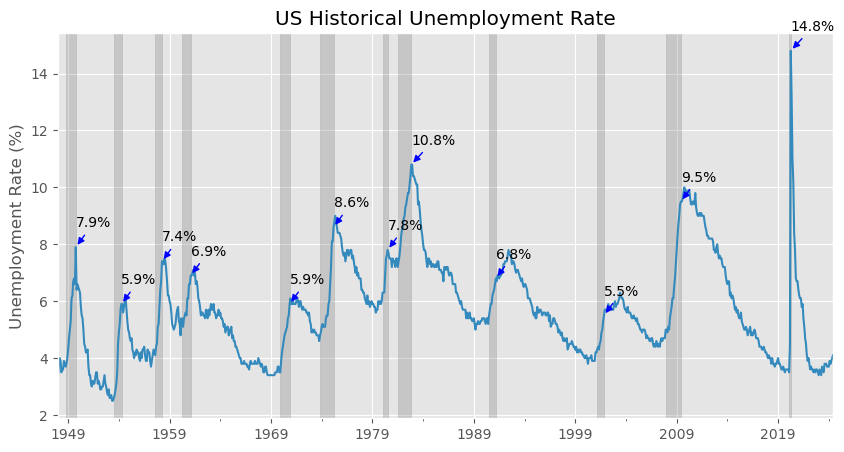

In [180]:
# plot US historical unemployment data, highlight recession periods, and label peak unemployment rate per recession period
unem.plot(
    x = 'date',
    y = 'unemployment_rate',
    figsize = (10, 5),
    title = 'US Historical Unemployment Rate',
    color = color_pal[1],
    ylabel = 'Unemployment Rate (%)',
    xlabel = '',
    legend = False
)

# recession dates: https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/
recession_dates = [
    ('1948-11-01', '1949-10-01'),
    ('1953-07-01', '1954-05-01'),
    ('1957-08-01', '1958-04-01'),
    ('1960-04-01', '1961-02-01'),
    ('1969-12-01', '1970-11-01'),
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]
recession = pd.DataFrame(recession_dates, columns=['start_date', 'end_date'])
recession['start_date'] = pd.to_datetime(recession['start_date'])
recession['end_date'] = pd.to_datetime(recession['end_date'])

# loop through each recession period to create vertical bars and label peak unemployment rate
for index, row in recession.iterrows():
    
    start_date = row['start_date']
    end_date = row['end_date']

    # recession vertical bar
    plt.axvspan(start_date, end_date, alpha=0.3, color='gray')
    
    # filter data within the current recession period
    unem_rec = unem.loc[(unem['date'] >= start_date) & (unem['date'] <= end_date)]

    # find max value within recession period
    max_unem = unem_rec['unemployment_rate'].max()
    max_date = unem_rec.loc[unem_rec['unemployment_rate'].idxmax(), 'date']
    
    # label max value
    plt.annotate(
        f'{max_unem}%', 
        xy = (max_date, max_unem), 
        xytext = (max_date, max_unem + .7),
        arrowprops = dict(arrowstyle = '-|>', color='blue', linewidth = 1)
    )


plt.savefig('unemplyment_rate.png', dpi=300, bbox_inches='tight')

plt.show()

#### Pull unemployment data by state

In [140]:
# search for unemployment rate by state
unem_search = fred.search('unemployment rate state')

In [141]:
# attempting to filter results to unemployemnt by state
unem_search = unem_search.query("frequency == 'Monthly' and seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
unem_search = unem_search.loc[unem_search['title'].str.contains('Unemployment Rate in')]
unem_search = unem_search[unem_search['id'].str.len() == 4]
print(unem_search.shape)
unem_search

(52, 15)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-07-29,2024-07-29,Unemployment Rate in California,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:02-05:00,64,None
TXUR,TXUR,2024-07-29,2024-07-29,Unemployment Rate in Texas,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:02-05:00,56,None
NYUR,NYUR,2024-07-29,2024-07-29,Unemployment Rate in New York,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:03-05:00,53,None
FLUR,FLUR,2024-07-29,2024-07-29,Unemployment Rate in Florida,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:03-05:00,51,None
PAUR,PAUR,2024-07-29,2024-07-29,Unemployment Rate in Pennsylvania,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:03-05:00,44,None
OHUR,OHUR,2024-07-29,2024-07-29,Unemployment Rate in Ohio,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:04-05:00,41,None
MIUR,MIUR,2024-07-29,2024-07-29,Unemployment Rate in Michigan,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:04-05:00,38,None
ALUR,ALUR,2024-07-29,2024-07-29,Unemployment Rate in Alabama,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:04-05:00,38,None
MAUR,MAUR,2024-07-29,2024-07-29,Unemployment Rate in Massachusetts,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:04-05:00,37,None


In [142]:
# create state name column from title
unem_search['state'] = unem_search['title'].str.replace('Unemployment Rate in ', '')

In [143]:
# create a dictionary of series id: state to rename columns to state name
id_to_state = dict(zip(unem_search['id'], unem_search['state']))

In [144]:
# pull series data for each of the states unemployment data
import time
all_series = []
for id in unem_search.index:
    series = fred.get_series(id)
    series = series.to_frame(name = id)
    all_series.append(series)
    time.sleep(0.25) # slow request to not spam FRED

In [145]:
# concat the lists in all_series into a dataframe
unem_states = pd.concat(all_series, axis = 1)
unem_states.columns = [id_to_state[c] for c in unem_states.columns] # list comprehension
unem_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,5.8,3.7,4.1,3.0,2.0,3.1,5.3,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0


In [146]:
# check for missing values
print(unem_states.isnull().sum())
# Data validation
print(unem_states.describe())
# fix DC State
unem_states = unem_states.rename(columns={'the District of Columbia':'District Of Columbia'})
# drop Puerto Rico to match unemployment
unem_states = unem_states.drop(columns = 'Puerto Rico')

California                  0
Texas                       0
New York                    0
Florida                     0
Pennsylvania                0
Ohio                        0
Michigan                    0
Alabama                     0
Massachusetts               0
North Carolina              0
Illinois                    0
New Jersey                  0
Georgia                     0
Colorado                    0
Arizona                     0
Wisconsin                   0
Virginia                    0
Kentucky                    0
South Carolina              0
New Mexico                  0
Minnesota                   0
Tennessee                   0
Washington                  0
Maryland                    0
Oregon                      0
West Virginia               0
Nevada                      0
Arkansas                    0
Oklahoma                    0
Missouri                    0
Alaska                      0
Iowa                        0
Utah                        0
Puerto Ric

In [147]:
# filter to the date with the max total US unemployment rate
max_unem = unem['date'][unem['unemployment_rate'].idxmax()]
unem_states_max = unem_states.loc[unem_states.index == max_unem].T.sort_values(max_unem)
unem_states_max = unem_states_max.dropna()
unem_states_max

,2020-04-01
Wyoming,5.1
Nebraska,8.2
Connecticut,8.3
North Dakota,8.7
South Dakota,8.8
Minnesota,8.9
Maryland,9.0
New Mexico,9.0
Maine,9.3
Utah,10.0


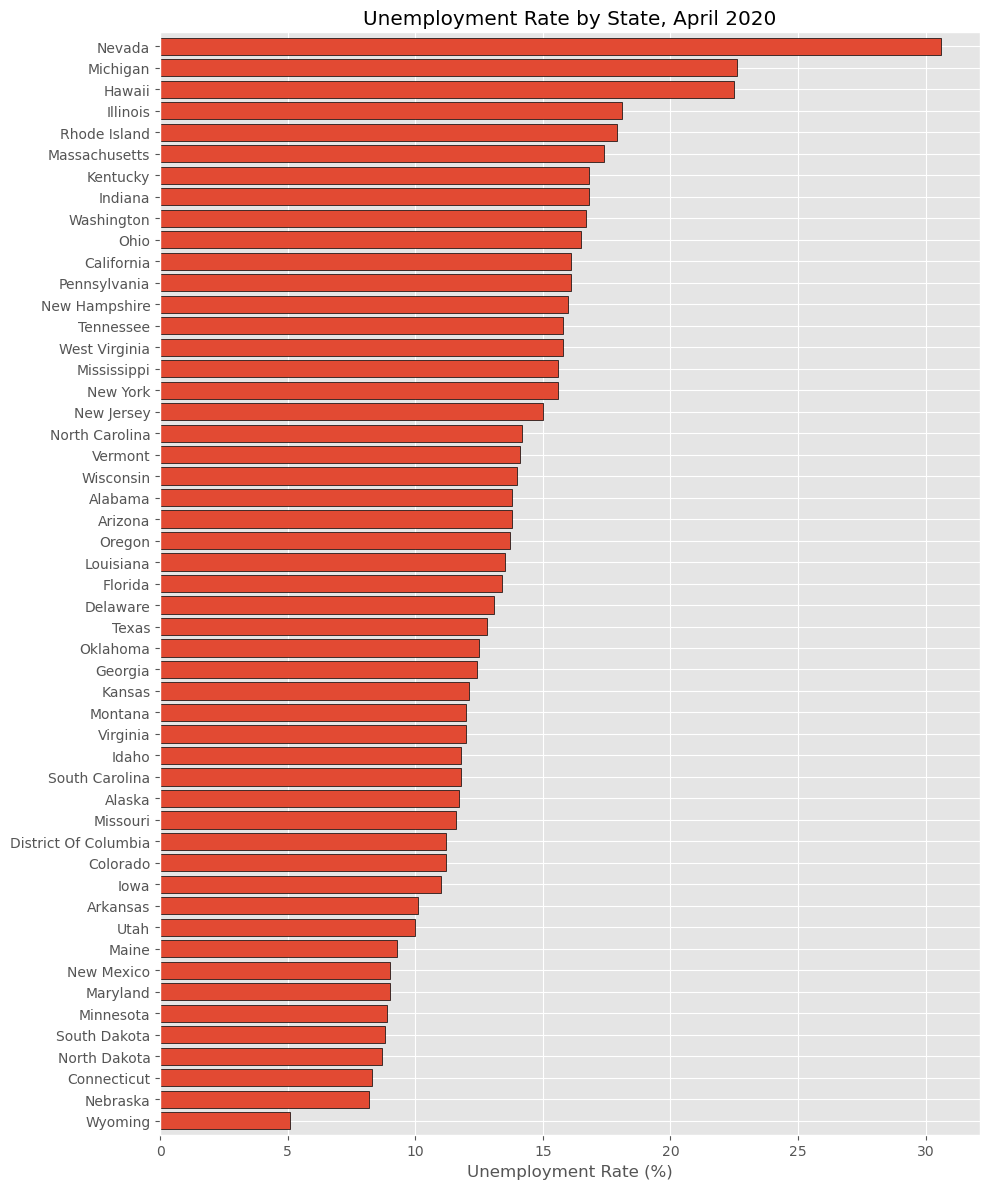

In [148]:
# plot unemployment rate by state for the month/year with the highest unemployment rate
unem_states_max.plot(
    kind = 'barh',
    title = f'Unemployment Rate by State, {max_unem:%B %Y}',
    figsize = (10,12),
    legend = False,
    width = 0.8,
    edgecolor = 'black',
    xlabel = 'Unemployment Rate (%)'
)

plt.tight_layout()
plt.show()

#### Pull participation Rate

In [150]:
part_search = fred.search('participation rate in state')

In [151]:
# attempt to filter to state level participation rate
part_search = part_search.query("frequency == 'Monthly' and seasonal_adjustment_short == 'SA' and units_short == '%'")
part_search = part_search[part_search['title'].str.contains('Labor Force Participation Rate for')]
part_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-07-29,2024-07-29,Labor Force Participation Rate for California,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:03-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-07-29,2024-07-29,Labor Force Participation Rate for Alabama,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:06-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-07-29,2024-07-29,Labor Force Participation Rate for New York,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-07-29,2024-07-29,Labor Force Participation Rate for Michigan,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:02-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-07-29,2024-07-29,Labor Force Participation Rate for Mississippi,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:02-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2024-07-29,2024-07-29,Labor Force Participation Rate for Texas,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2024-07-29,2024-07-29,Labor Force Participation Rate for Florida,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:03-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2024-07-29,2024-07-29,Labor Force Participation Rate for Kentucky,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:02-05:00,20,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2024-07-29,2024-07-29,Labor Force Participation Rate for Ohio,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-19 09:01:07-05:00,14,A state's labor-force participation rate is th...


In [152]:
# create a dictionary of id:state to rename columns to state name
part_id_to_state = part_search['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [153]:
# pull all state series data from FRED
all_series = []

for id in part_search.index:
    series = fred.get_series(id)
    series = series.to_frame(name = id)
    all_series.append(series)
    time.sleep(0.25) # Slow query to not spam FRED

In [154]:
# concatenate all the state series data and rename columns
part_states = pd.concat(all_series, axis = 1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns] # list comprehension
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,62.1,57.4,61.4,62.2,53.7,64.1,59.4,56.9,61.8,65.7,62.5,64.8,67.9,65.0,55.2,59.5,59.3,64.6,60.7,61.4,58.7,57.1,68.1,69.2,66.6,62.8,63.1,64.5,67.2,65.1,64.0,62.2,57.2,62.6,57.4,63.2,68.7,60.0,62.8,63.0,62.6,65.2,65.3,64.5,68.9,67.8,66.1,64.1,72.3,60.5,63.1
2024-03-01,62.0,57.4,61.4,62.3,53.7,64.1,59.4,56.9,61.8,65.6,62.7,64.9,68.0,65.0,55.2,59.6,59.3,64.6,60.6,61.4,58.7,57.1,68.0,69.0,66.5,62.6,63.1,64.5,67.0,65.1,63.9,62.2,57.2,62.6,57.4,63.2,68.7,59.9,62.7,62.9,62.8,65.3,65.4,64.6,68.9,67.7,66.1,64.4,72.6,60.3,63.0
2024-04-01,62.0,57.5,61.3,62.3,53.7,64.2,59.3,57.1,61.8,65.6,62.9,65.1,68.0,65.2,55.2,59.6,59.4,64.7,60.6,61.5,58.8,57.2,68.0,68.9,66.4,62.5,63.3,64.6,66.8,65.0,63.8,62.2,57.2,62.7,57.5,63.2,68.6,59.7,62.7,62.8,62.9,65.5,65.5,64.6,69.0,67.6,66.1,64.7,72.8,60.1,63.0
2024-05-01,62.0,57.5,61.3,62.3,53.8,64.2,59.1,57.3,61.9,65.6,62.9,65.3,68.0,65.3,55.1,59.6,59.5,64.9,60.5,61.6,58.6,57.2,67.9,68.7,66.3,62.4,63.4,64.5,66.7,64.9,63.7,62.2,57.2,62.7,57.6,63.2,68.5,59.6,62.7,62.8,63.0,65.6,65.6,64.7,68.9,67.5,66.1,64.9,72.7,59.9,62.9


#### Plot Unemployment vs Participation (New Jersey)

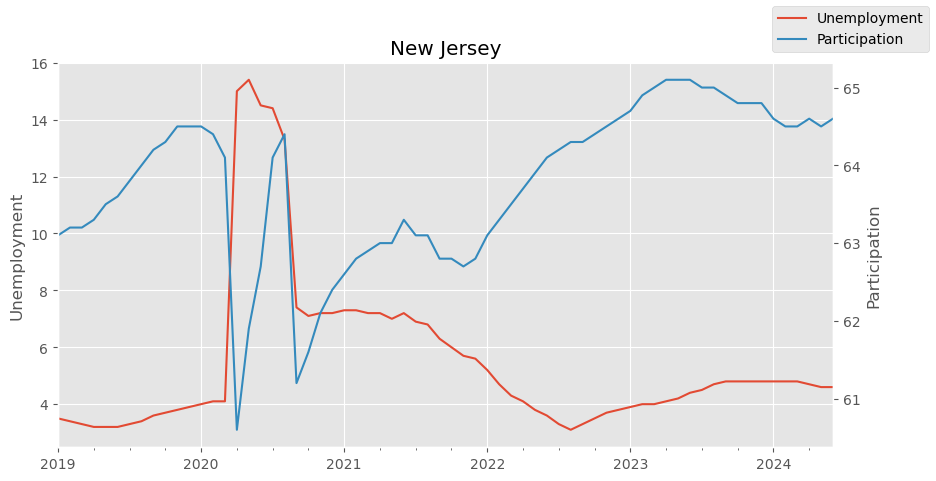

In [156]:
fig, ax = plt.subplots(figsize = (10, 5), sharex = True)
ax2 = ax.twinx()

# plot unemployment
unem_states.query('index >= 2019')['New Jersey'].plot(
    ax = ax, 
    label = 'Unemployment',
    ylabel = 'Unemployment'
)

# plot participation
part_states.query('index >= 2019')['New Jersey'].plot(
    ax = ax2, 
    label = 'Participation',
    ylabel = 'Participation',
    color = color_pal[1]
)
ax2.grid(False)

ax.set_title('New Jersey')
fig.legend(labels = ['Unemployment', 'Participation'])
plt.show()

#### Plot Unemployment vs Participation (All States)

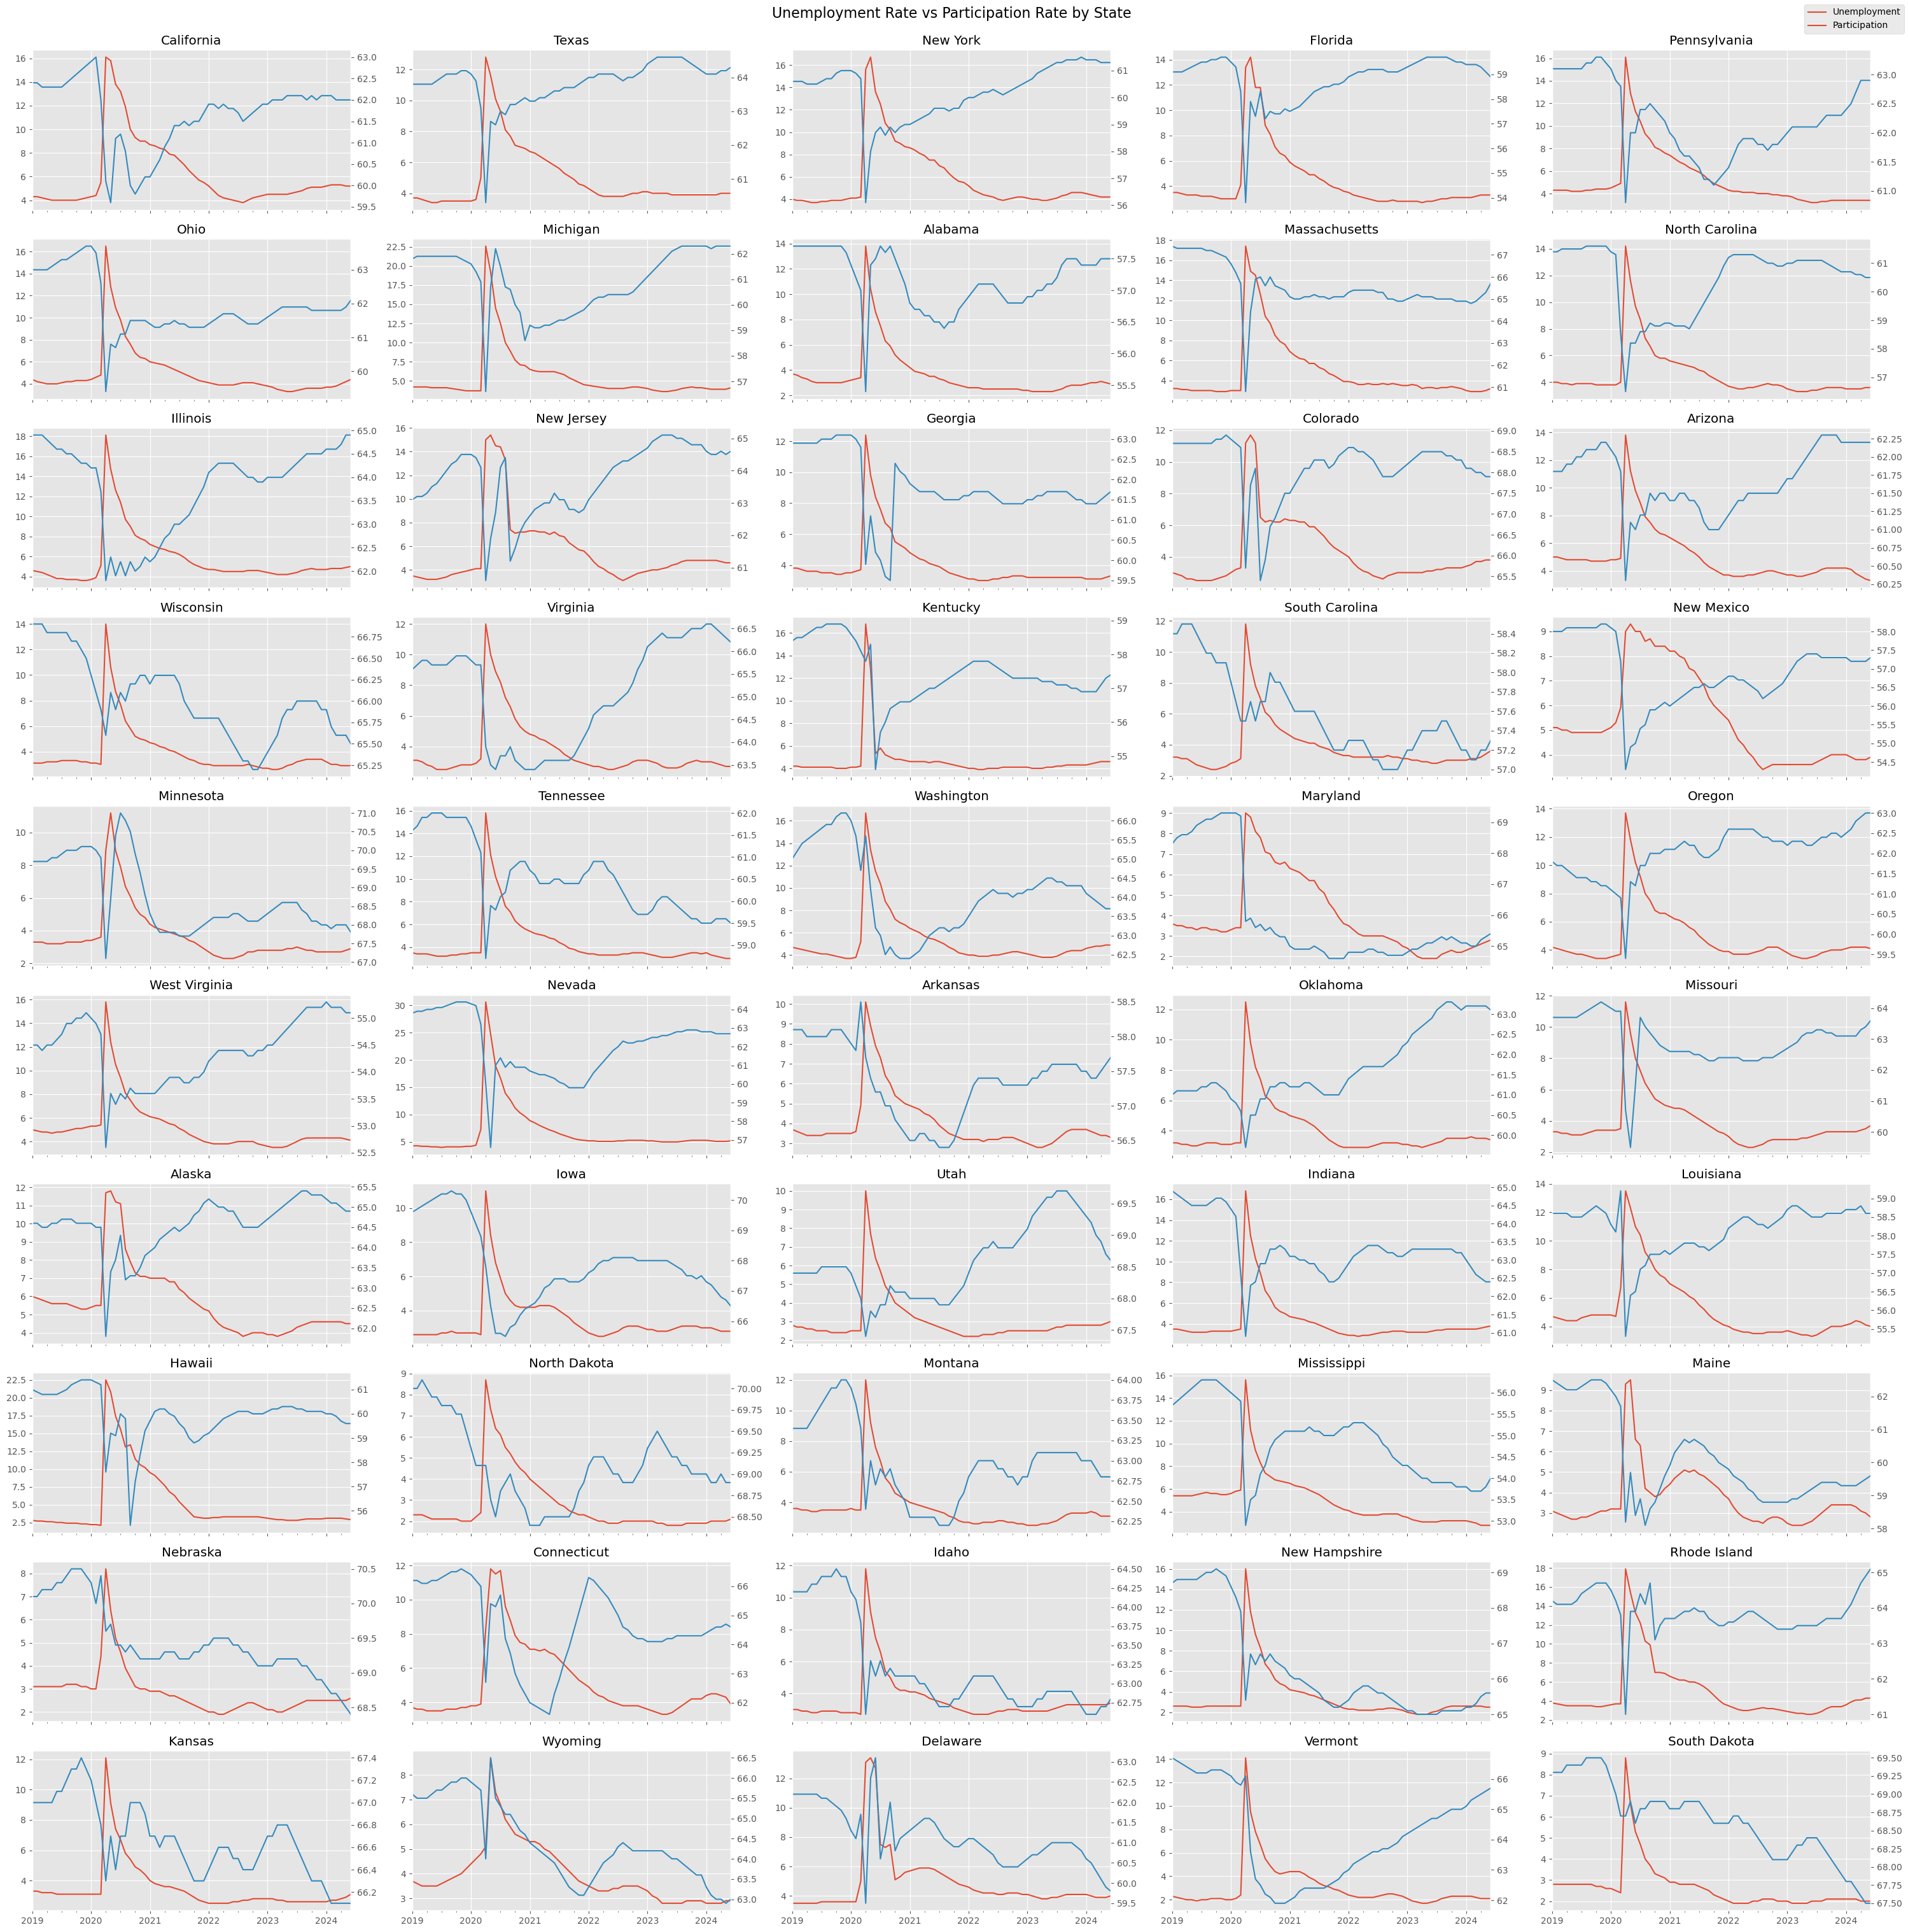

In [186]:
# plot unemployment vs participation for all states by looping through columns

fig, axs = plt.subplots(10,5, figsize = (30,30), sharex = True)
axs = axs.flatten()

i = 0
for state in unem_states.columns:
    # drop DC to fit in 10x5 plot
    if state == 'District Of Columbia':
        continue
    
    ax2 = axs[i].twinx()

    # plot unemployment per state
    unem_states.query('index >= 2019')[state].plot(
        ax = axs[i], 
        label = 'Unemployment'
    )

    # plot particpation per state
    part_states.query('index >= 2019')[state].plot(
        ax = ax2, label = 'Participation', 
        color = color_pal[1]
    )

    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
fig.suptitle('Unemployment Rate vs Participation Rate by State', fontsize = 16, y = 1.01)
fig.legend(labels = ['Unemployment', 'Participation'])

plt.savefig('unemployment_vs_participation.png', dpi=300, bbox_inches='tight')
plt.show()    